## How does people's mental health be affected for different age groups?


In [34]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("CSCS_data_anon (1).csv", low_memory=False)
data 

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,...,PSYCH_body_self_image_questionnaire_height_dissatisfaction_score,PSYCH_body_self_image_questionnaire_fatness_evaluation_score,PSYCH_body_self_image_questionnaire_negative_affect_score,PSYCH_body_self_image_questionnaire_social_dependence_score,PSYCH_big_five_inventory_agreeable_score,PSYCH_big_five_inventory_conscientious_score,PSYCH_big_five_inventory_extraverted_score,PSYCH_big_five_inventory_neurotic_score,PSYCH_big_five_inventory_open_score,REMOVE_case
0,cscs_00001,1,Yes,Yes,British Columbia,71.0,Non-binary,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,cscs_00002,1,Yes,Yes,Ontario,69.0,Woman,NaN,NaN,Not Selected,...,3.0,8.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,No
2,cscs_00003,1,Yes,Yes,Quebec,56.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,cscs_00005,1,Yes,Yes,NaN,54.0,Woman,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,28.0,34.0,30.0,32.0,37.0,No
4,cscs_00006,1,Yes,Yes,Ontario,30.0,Man,Not Selected,"Indigenous peoples (e.g., First Nations, Métis...","Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11426,cscs_11809,1,Yes,Yes,NaN,45.0,Woman,NaN,NaN,"Sexual or gender minorities (e.g., LGBTQ2+)",...,NaN,NaN,NaN,NaN,31.0,33.0,33.0,13.0,39.0,No
11427,cscs_11810,1,Yes,Yes,British Columbia,36.0,Man,NaN,NaN,Not Selected,...,NaN,NaN,NaN,NaN,32.0,37.0,31.0,NaN,38.0,No
11428,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
11429,cscs_11812,3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


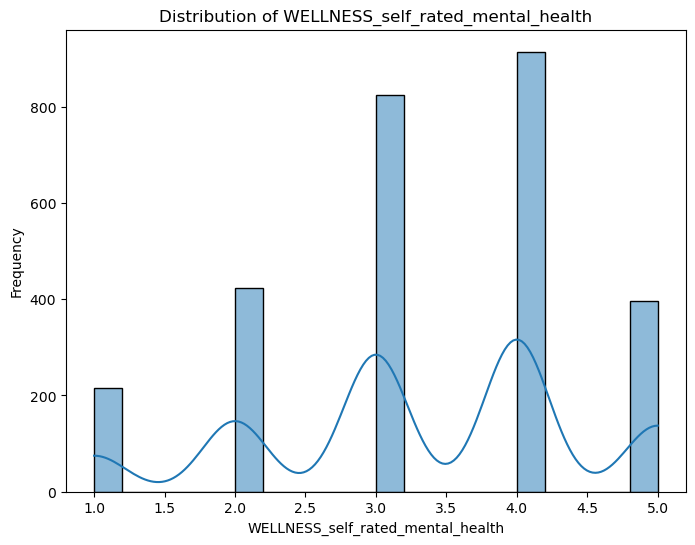

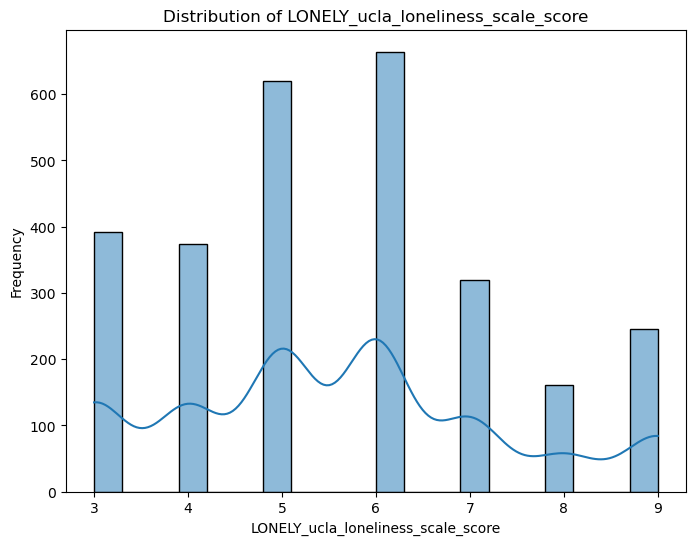

In [75]:
plt.figure(figsize=(8, 6))
sns.histplot(data_for_regression_cleaned['WELLNESS_self_rated_mental_health'], bins=20, kde=True)
plt.title('Distribution of WELLNESS_self_rated_mental_health')
plt.xlabel('WELLNESS_self_rated_mental_health')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data_for_regression_cleaned['LONELY_ucla_loneliness_scale_score'], bins=20, kde=True)
plt.title('Distribution of LONELY_ucla_loneliness_scale_score')
plt.xlabel('LONELY_ucla_loneliness_scale_score')
plt.ylabel('Frequency')
plt.show()


### 1. Explore which daily activity have correlation to lonley score for different groups of people

outcome variable:
LONELY_ucla_loneliness_scale_score_y_n  
(yes or no) 

predictor variable:
demo_age
DEMO_gender
CONNECTION_social_time_friends_p7d_grouped
CONNECTION_social_time_family_p7d_grouped
CONNECTION_activities_computer_games_p3m

Cleaned data shape: (2166, 6)
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.77      0.64       332
         1.0       0.58      0.33      0.42       318

    accuracy                           0.56       650
   macro avg       0.56      0.55      0.53       650
weighted avg       0.56      0.56      0.53       650



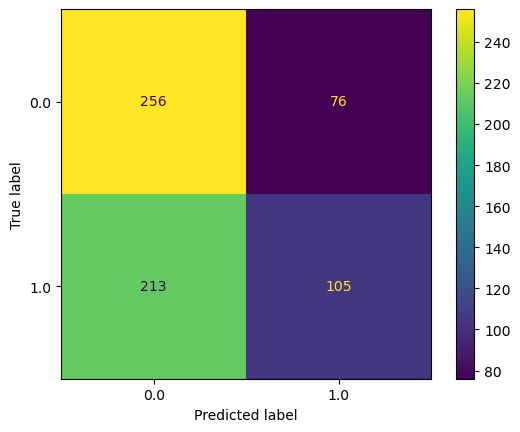

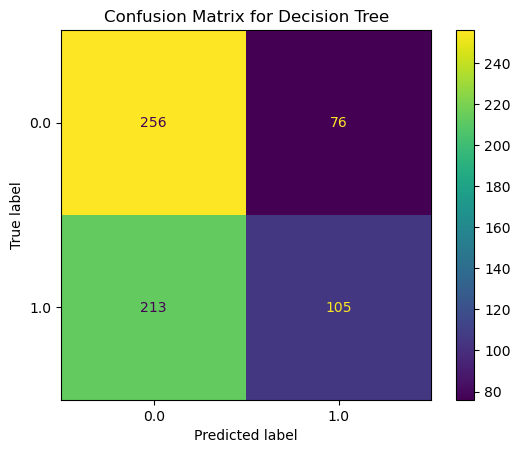

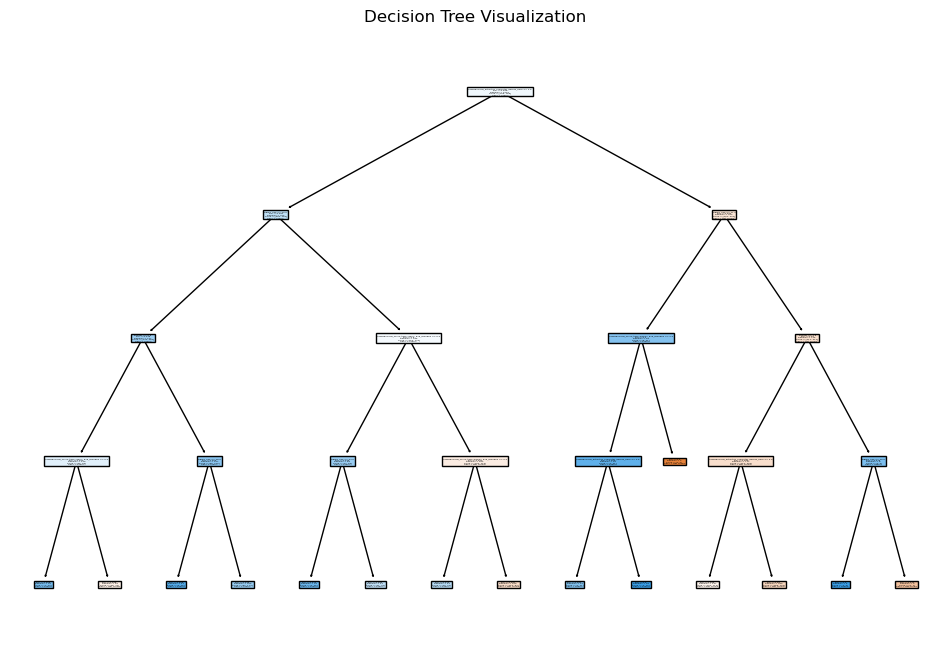

In [35]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Map variables to numeric
data['LONELY_ucla_loneliness_scale_score_y_n'] = data['LONELY_ucla_loneliness_scale_score_y_n'].replace({'Yes (6-9)': 1, 'No (3-5)': 0})
data['gender'] = data['DEMO_gender'].map({'Man': 0, 'Woman': 1, 'Non-binary': 2})
data['CONNECTION_social_time_friends_p7d_grouped'] = data['CONNECTION_social_time_friends_p7d_grouped'].map({
    'No time': 0, 'Less than 1 hour': 1, '1 to 4 hours': 2, '5 or more hours': 3})
data['CONNECTION_social_time_family_p7d_grouped'] = data['CONNECTION_social_time_family_p7d_grouped'].map({
    'No time': 0, 'Less than 1 hour': 1, '1 to 4 hours': 2, '5 or more hours': 3})
data['CONNECTION_activities_computer_games_p3m'] = data['CONNECTION_activities_computer_games_p3m'].map({
    'Daily or almost daily': 7, 'A few times a week': 5, 'Weekly': 4, 'Monthly': 2, 'Not in the past three months': 0})

# Drop rows where any feature or target variable is missing
selected_columns = [
    "LONELY_ucla_loneliness_scale_score_y_n", "DEMO_age", "gender",
    "CONNECTION_social_time_friends_p7d_grouped", "CONNECTION_social_time_family_p7d_grouped",
    "CONNECTION_activities_computer_games_p3m"
]
cleaned_data = data[selected_columns].dropna()  # Drop rows with any missing values

# Check cleaned data
print("Cleaned data shape:", cleaned_data.shape)

# Train/test split
X = cleaned_data.drop(columns=["LONELY_ucla_loneliness_scale_score_y_n"])
y = cleaned_data["LONELY_ucla_loneliness_scale_score_y_n"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Evaluate model
y_pred = tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test).plot()
plt.title("Confusion Matrix for Decision Tree")
plt.show()
plt.close()  # Close confusion matrix plot

# Visualize decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=["Not Lonely", "Lonely"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()




###  Analysis about decision tree result: 
Precision: 0.55
Indicates that about 55% of the samples predicted as non-lonely are accurate

Recall: 0.77
Recall indicates the proportion of samples that are actually 0 (non-lonely) and correctly predicted as 0. A recall of 77% means that the model can correctly identify about 77% of non-lonely samples and miss 23%.

F1-Score: 0.64
The F1-Score takes into account the precision and recall and is their harmonic mean. An F1-Score of 0.64 means that the model is somewhat effective in identifying non-lonely samples.

The model performs well in identifying non-lonely samples (recall rate 77%), but when identifying lonely samples, the recall rate is low, only 33%,  the model's ability to identify lonely samples is insufficient.

May be these factors do not show very strong correlation in deciding lonliness groups？

Feature Importances:
 DEMO_age                                      0.305887
gender                                        0.101398
CONNECTION_social_time_friends_p7d_grouped    0.120366
CONNECTION_social_time_family_p7d_grouped     0.146968
CONNECTION_activities_computer_games_p3m      0.325381
dtype: float64


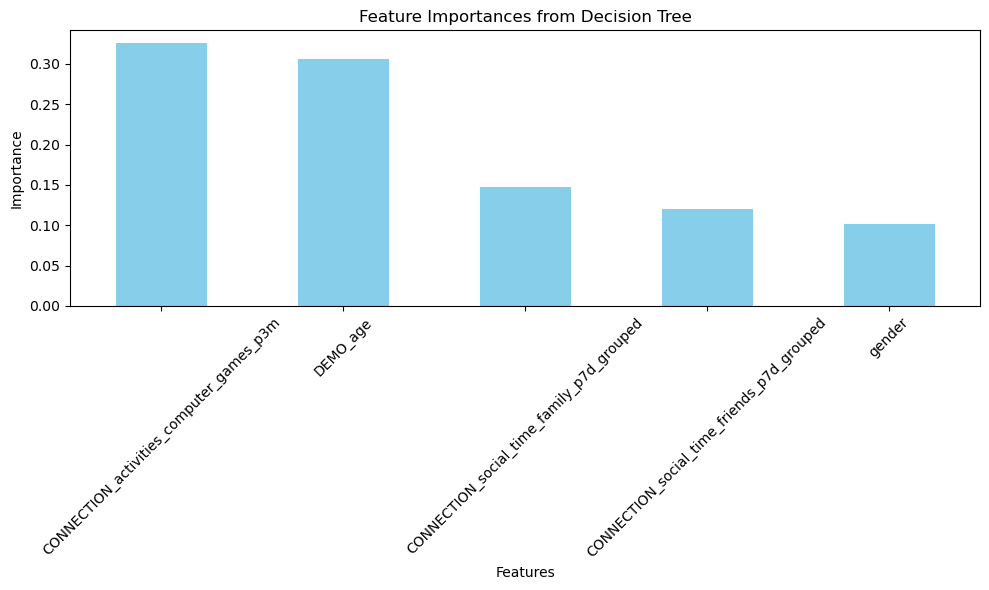

In [37]:
# Display feature importance
feature_importances = pd.Series(tree.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances)

# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importances data
feature_importances = pd.Series({
    "DEMO_age": 0.305887,
    "gender": 0.101398,
    "CONNECTION_social_time_friends_p7d_grouped": 0.120366,
    "CONNECTION_social_time_family_p7d_grouped": 0.146968,
    "CONNECTION_activities_computer_games_p3m": 0.325381
}).sort_values(ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importances from Decision Tree")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [38]:
correlation_matrix = cleaned_data.corr()
print(correlation_matrix)


                                            LONELY_ucla_loneliness_scale_score_y_n  \
LONELY_ucla_loneliness_scale_score_y_n                                    1.000000   
DEMO_age                                                                  0.019713   
gender                                                                    0.089190   
CONNECTION_social_time_friends_p7d_grouped                               -0.064693   
CONNECTION_social_time_family_p7d_grouped                                -0.103885   
CONNECTION_activities_computer_games_p3m                                 -0.127113   

                                            DEMO_age    gender  \
LONELY_ucla_loneliness_scale_score_y_n      0.019713  0.089190   
DEMO_age                                    1.000000  0.183211   
gender                                      0.183211  1.000000   
CONNECTION_social_time_friends_p7d_grouped -0.164160 -0.014414   
CONNECTION_social_time_family_p7d_grouped  -0.091436  0.002209   
C

> From the correlation value above, we can see that  LONELY_ucla_loneliness_scale_score_y_n show very little correlation with daily activity and different kind of groups. the strongest factor that affect lonley score is  LONELY_ucla_loneliness_scale_score_y_n  .

## 2. Does different age groups have an impact on the correlation between WELLNESS_self_rated mental_health and LONELY ucla_loneliness_scale_score?

2.
>
Variable being used: 

> WELLNESS_self_rated_mental_health

> LONELY_ucla_loneliness_scale_score

> DEMO_age

In [70]:
columns_of_interest = ['WELLNESS_self_rated_mental_health', 'LONELY_ucla_loneliness_scale_score', 'DEMO_age']

# 加载文件，仅保留相关列
data = pd.read_csv("CSCS_data_anon (1).csv", usecols=columns_of_interest)

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. delete NAN
data_cleaned = data.dropna(subset=columns_of_interest)

# 3. Convert `WELLNESS_self_rated_mental_health` to numeric
wellness_mapping = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent": 5
}
data_cleaned['WELLNESS_self_rated_mental_health'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(wellness_mapping)

# 4. grouping`DEMO_age` 
data_cleaned['Age_Group'] = pd.cut(
    data_cleaned['DEMO_age'],
    bins=[0, 35, 60, 100],
    labels=['18-35', '36-60', '60+']
)

# 5. descriptive sta
descriptive_stats = data_cleaned.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

grouped_stats = data_cleaned.groupby('Age_Group').mean()
print("\nGrouped Statistics by Age Group:\n", grouped_stats)


Missing Values:
 DEMO_age                              1211
WELLNESS_self_rated_mental_health     2100
LONELY_ucla_loneliness_scale_score    7552
dtype: int64

Descriptive Statistics:
           DEMO_age  WELLNESS_self_rated_mental_health  \
count  2789.000000                        2776.000000   
mean     39.612764                           3.307277   
std      16.192837                           1.127685   
min      16.000000                           1.000000   
25%      27.000000                           3.000000   
50%      34.000000                           3.000000   
75%      52.000000                           4.000000   
max      89.000000                           5.000000   

       LONELY_ucla_loneliness_scale_score  
count                         2789.000000  
mean                             5.577985  
std                              1.730838  
min                              3.000000  
25%                              4.000000  
50%                              6.00

/tmp/ipykernel_320/4195359887.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['WELLNESS_self_rated_mental_health'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(wellness_mapping)
/tmp/ipykernel_320/4195359887.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age_Group'] = pd.cut(
/tmp/ipykernel_320/4195359887.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

In [82]:
# Convert WELLNESS_self_rated_mental_health to numeric if it's not already
if data_cleaned['WELLNESS_self_rated_mental_health'].dtype == 'object':
    # Perform label encoding or mapping
    mapping = {
        'Poor': 1,
        'Fair': 2,
        'Good': 3,
        'Very good': 4,
        'Excellent': 5
    }
    data_cleaned['WELLNESS_self_rated_mental_health'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mapping)

# Ensure DEMO_age is numeric
data_cleaned['DEMO_age'] = pd.to_numeric(data_cleaned['DEMO_age'], errors='coerce')

# Check for any remaining missing or invalid data
data_cleaned = data_cleaned.dropna(subset=['WELLNESS_self_rated_mental_health', 'DEMO_age'])

# Interaction term
data_cleaned['Mental_Health_Age_Interaction'] = (
    data_cleaned['WELLNESS_self_rated_mental_health'] * data_cleaned['DEMO_age']
)

# Define X and y
X = data_cleaned[['WELLNESS_self_rated_mental_health', 'DEMO_age', 'Mental_Health_Age_Interaction']]
y = data_cleaned['LONELY_ucla_loneliness_scale_score']

# Add constant for regression
X = sm.add_constant(X)

# Regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                                    OLS Regression Results                                    
Dep. Variable:     LONELY_ucla_loneliness_scale_score   R-squared:                       0.241
Model:                                            OLS   Adj. R-squared:                  0.240
Method:                                 Least Squares   F-statistic:                     293.6
Date:                                Wed, 27 Nov 2024   Prob (F-statistic):          1.60e-165
Time:                                        05:27:41   Log-Likelihood:                -5081.5
No. Observations:                                2776   AIC:                         1.017e+04
Df Residuals:                                    2772   BIC:                         1.019e+04
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                        coef    st

/tmp/ipykernel_320/3378139036.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['WELLNESS_self_rated_mental_health'] = data_cleaned['WELLNESS_self_rated_mental_health'].map(mapping)
/tmp/ipykernel_320/3378139036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['DEMO_age'] = pd.to_numeric(data_cleaned['DEMO_age'], errors='coerce')


LONELY_ucla_loneliness_scale_score = 6.356−0.231⋅Mental_Health + 0.039⋅Age−0.012⋅(Mental_Health×Age)
Interaction term : Mental_Health_Age_Interaction=WELLNESS_self_rated_mental_health×DEMO_age

> Analysis： The P value is 0.000 of WELLNESS_self_rated_mental_health . This shows that mental health scores have a significant negative correlation with loneliness scores. The better the mental health, the lower the loneliness.

> The results show that the mental health score is significantly negatively correlated with the loneliness score (P < 0.001, coefficient is -0.7294), which shows that the worse the mental health, the higher the loneliness.
This supports the hypothesis that there is a systemic relationship between mental health and loneliness.

> Significance (p value = 0.000):
> A p-value = 0.000 indicates that the interaction term is statistically significant, which means:
The interaction between age and mental health plays an important role in loneliness.
That is, age will moderate the impact of mental health on loneliness.

There are differences in the impact of mental health on loneliness among different age groups, and loneliness in the older age group has a greater impact on mental health.